## 3. Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models

**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.

**Context**

Before building a new wind farm, Vestas needs to get an estimate of how much power it can produce. This can be done by running a simulation of the planned wind farm. The primary factors that decide how much power will be produced are: 

-  the turbine type (bigger turbines generally produce more energy), 

- the locations of the turbines (more energy is produced if the turbines are placed so that they do not block each other significantly) and 

- the wind speed and wind direction at the location where the wind farm is planned to be build. 

The turbine type and location is something that Vestas engineers get to decide, but wind is not so easily managed... Therefore, it is important to have a large amount of data to get a precise description of the distribution of wind speeds and wind directions at the potential site. Ideally a wind measuring mast would be build at the place of interest and collect data on wind speeds and wind directions for 20 years or so prior to the wind farm being build. However, the investers would probably become impatient if they had to wait for 20 years before construction could begin. 

So instead, a mast is build that collects data for a few years (typically 1-4 years). To account for more "global" variations in wind from year to year (some years are simply more windy than other years), the data from the mast is then compared to the data based on wind models which covers a much longer time scale. This model data (referred to as "meso" data) can be obtained for any location on Earth, and accounts for large scale wind variations (e.g. due to seasons, geography, Coriolis effect etc.). But it cannot be expected to give a precise description of the wind at a specific location, which is also affected by vegetation, buildings, the local landscape and so on. So in summary, the mast data captures the specific wind conditions for the given site, and the meso data accounts for variations in wind speeds on a longer time scale. Together, the two datasets usually give a good description of the wind at a specific site over a long time period, and therefore can be used to predict the expected power production over a long time span (e.g. 20 years, comparable to the life time of a wind farm).

Below is an illustration comparing a meso and a mast time series. Note that this plot is only for illustration purposes. In reality, meso data typically has a frequency of 1 hour, and mast data has a frequency of 10 minutes. Besides, the figure only illustrates the variations in windspeeds. For the actual simulations, wind directions are also extremely important (e.g. to determine the locations of the turbines such that they don't block each other for the prevalent wind directions).

![Illustration of meso vs mast time series](timeseries_example.png)

In order to run a simulation for a given (potential) site, Vestas needs to obtain a single time series which has the same characteristics as the mast timeseries, but has a time span of 20 years like the meso time series. For this purpose, they currently use a neural network: They train the network on the overlapping parts of the mast and meso time series. Specifically, they train the network to be able to predict the mast wind speeds and wind directions based on the wind speeds and wind directions found in the meso data for the same time stamps. After the neural network has been trained, they feed the meso wind speeds and wind directions for the entire 20 years time span to get a *predicted* "mast" time series covering the 20 years of data found in the meso data. This *predicted* mast time series is called the "long term corrected" (LTC) time series, and is the one on which they base their simulations for the power production at the given site. 

However, traning neural networks is time consuming and expensive! Therefore, Vestas is curious if some kind of linear regression would be able to acheive comparable results. 

**Data**
 
You will have access to two types of time series data:

1) Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast.

2) Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**
 
The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**

Please note. We have supplied some examples of how students have previously done the preprocessing to give you some input and thus make the work load a bit less. Feel free to use/reuse the preprocessing steps of these solutions.

1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique. Feel free to use or get inspired by previous solutions.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.
    
    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.  
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2. **Optional: Exploratory analysis:** You may do an exploratory analysis of the data, but this part is not mandatory. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. **(You can skip this part if you want to)**
3. **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4. **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
**Optional**: If you did step 2 above, in addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5. **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.


**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

*Risø:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)


*Børglum:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 8, we will do a Q/A if you have any questions. But as mentioned, try to give it a go. 

# Preproccessing Borglum Data

In [62]:
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [226]:
import netCDF4 as nc

file_path_borglum = 'C:/Users/camil/Downloads/Data/Borglum/borglum_all.nc'
dataset = nc.Dataset(file_path_borglum, 'r')

## Handling Mast Data

In [227]:
# lets convert data to dataframe
column_names = []
for var_name in dataset.variables:
    column_names.append(var_name)
    
df_mast_data = pd.DataFrame()
for column_name in column_names:
    tmp_np = np.array(dataset.variables[column_name])
    df_mast_data[column_name] = tmp_np
df_mast_data.describe()

,time,ws32,ws32_qc,ws20,ws20_qc,ws10,ws10_qc,wd10,wd10_qc,wd32,...,td10_2,td10_2_qc,td30_10,td30_10_qc,rhum,rhum_qc,grad,grad_qc,press,press_qc
count,2.122790e+05,211046.000000,211046.0,198670.000000,198670.0,206247.000000,206247.0,212270.000000,212270.0,204907.000000,...,212279.000000,212279.0,212279.000000,212279.0,212276.000000,212276.0,212279.000000,212279.0,205453.000000,205453.0
mean,1.067308e+06,6.618591,0.0,6.027335,0.0,5.443917,0.0,182.720479,0.0,185.061560,...,0.139489,0.0,0.054420,0.0,81.749322,0.0,112.399173,0.0,1009.414265,0.0
std,6.171817e+05,3.299422,0.0,3.172190,0.0,3.008973,0.0,91.017378,0.0,90.418746,...,0.683429,0.0,0.599545,0.0,14.878764,0.0,178.268002,0.0,11.623661,0.0
min,0.000000e+00,0.120000,0.0,0.100000,0.0,0.100000,0.0,0.000000,0.0,0.000000,...,-2.740000,0.0,-2.330000,0.0,0.000000,0.0,0.000000,0.0,954.700000,0.0
25%,5.306950e+05,4.240000,0.0,3.730000,0.0,3.200000,0.0,113.000000,0.0,117.000000,...,-0.130000,0.0,-0.210000,0.0,74.000000,0.0,15.000000,0.0,1002.160000,0.0
50%,1.071720e+06,6.080000,0.0,5.520000,0.0,4.970000,0.0,188.000000,0.0,192.000000,...,0.050000,0.0,-0.120000,0.0,84.000000,0.0,20.000000,0.0,1009.920000,0.0
75%,1.602415e+06,8.590000,0.0,7.950000,0.0,7.280000,0.0,262.000000,0.0,261.000000,...,0.280000,0.0,0.110000,0.0,95.000000,0.0,124.000000,0.0,1017.170000,0.0
max,2.133110e+06,26.260000,0.0,25.280000,0.0,23.550000,0.0,360.000000,0.0,360.000000,...,6.910000,0.0,8.730000,0.0,98.000000,0.0,1116.000000,0.0,1396.950000,0.0


## Finding and handling missing values in Mast Data, Evaluating columns based on completeness to choose signals
In the above dataframe, columns ending in qc appear to be containing only zeroes. In this section, we inspect the number of null or 0 values in 
the columns. Below,a dataframe is created showing the number of nulls, 0s, the combined count of the two within each column.
This allows us to confirm that the columns ending in qc contian only a mix of 0s and null values making the columns unneccesary. This
also allows us to evaluate the completness of the columns in order to select the height data we should use keeping in mind a higher altititude is preferred. The columns WS32 and WD32 contain wind speed and direction data from the highest altitude available in this datase and containws the least amount of missing data. 

In [228]:
import pandas as pd
import numpy as np

# Example DataFrame for demonstration (replace this with your actual DataFrame)
# df_mast_data = pd.DataFrame(...)

# Step 1: Create a function to count null values (NaN)
def count_nulls(column):
    return column.isnull().sum()

# Step 2: Create a function to count 0 and 0.0 values
def count_zeros(column):
    return (column == 0).sum()

# Step 3: Count the number of null values and zeros for each column
null_values_per_column = df_mast_data.apply(count_nulls)
zero_values_per_column = df_mast_data.apply(count_zeros)

# Step 4: Calculate the combined count of nulls, 0, and 0.0
combined_count_per_column = null_values_per_column + zero_values_per_column

# Step 5: Create a DataFrame to summarize the column names and counts
df_column_summary = pd.DataFrame({
    'Column Name': df_mast_data.columns,                     # List of column names
    'Null Values': null_values_per_column.values,            # Number of nulls per column
    'Zero Values': zero_values_per_column.values,            # Number of zeros per column
    'Combined Count': combined_count_per_column.values,      # Combined count of nulls and zeros
    'Total Rows': len(df_mast_data)                           # Total number of rows in each column
})
print(df_column_summary)

   Column Name  Null Values  Zero Values  Combined Count  Total Rows
0         time            0            1               1      212279
1         ws32         1233            0            1233      212279
2      ws32_qc         1233       211046          212279      212279
3         ws20        13609            0           13609      212279
4      ws20_qc        13609       198670          212279      212279
5         ws10         6032            0            6032      212279
6      ws10_qc         6032       206247          212279      212279
7         wd10            9          125             134      212279
8      wd10_qc            9       212270          212279      212279
9         wd32         7372          171            7543      212279
10     wd32_qc         7372       204907          212279      212279
11        t002            0          540             540      212279
12     t002_qc            0       212279          212279      212279
13         t30            0       

A small correlation test was conducted to see relevant columns related to the chosen signals.
 Relevant columns - looking at columns that have higher than a 0.75 correlation to the signals

,ws32,ws20,ws10,wd10,wd32,t002,t30,td10_2,td30_10
ws32,1.000000,0.984490,0.986874,NaN,NaN,NaN,NaN,NaN,NaN
ws20,0.984490,1.000000,0.984991,NaN,NaN,NaN,NaN,NaN,NaN
ws10,0.986874,0.984991,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
wd10,NaN,NaN,NaN,1.000000,0.943674,NaN,NaN,NaN,NaN
wd32,NaN,NaN,NaN,0.943674,1.000000,NaN,NaN,NaN,NaN
t002,NaN,NaN,NaN,NaN,NaN,1.000000,0.981273,NaN,NaN
t30,NaN,NaN,NaN,NaN,NaN,0.981273,1.000000,NaN,NaN
td10_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.750868
td30_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750868,1.000000


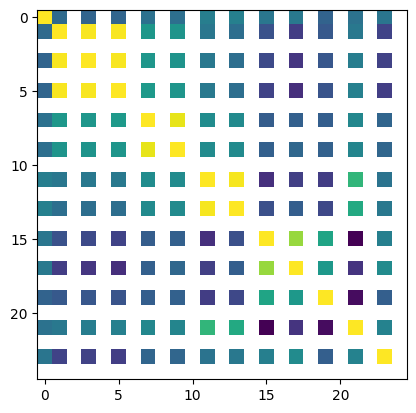

In [229]:
plt.imshow(df_mast_data.corr())
# display only columns with correlation higher than 0.75
my_corr = df_mast_data.corr()
my_corr[my_corr > 0.75].dropna(thresh=2).dropna(thresh=2, axis=1)

Because only a small proportion of data in the signal columns are null, the rows with null data will simply be removed 
as will the columns ending in qc. Here is a description of the new dataframe:


In [230]:
# Now, specify the list of column names you want to remove
columns_to_remove = ['ws32_qc','ws20','ws10','wd10','ws20_qc','ws10_qc','wd10_qc','wd32_qc','t002_qc','t30_qc','td10_2_qc','td30_10_qc','rhum_qc','grad_qc','press_qc','t002','t30','td10_2','td30_10','rhum','grad','press']

# Ensure that the columns exist before attempting to drop them
df_mast_data_cleaned = df_mast_data.drop(columns=[col for col in columns_to_remove if col in df_mast_data.columns])

# Display the cleaned DataFrame
#print(df_mast_data_cleaned)

df_mast_data_cleaned = df_mast_data_cleaned.dropna()
df_mast_data_cleaned.describe()


,time,ws32,wd32
count,2.037180e+05,203718.000000,203718.000000
mean,1.094620e+06,6.643221,184.875190
std,6.079454e+05,3.315433,90.419549
min,4.744000e+04,0.120000,0.000000
25%,5.600225e+05,4.270000,116.000000
50%,1.114475e+06,6.100000,191.000000
75%,1.623798e+06,8.640000,261.000000
max,2.133110e+06,26.260000,360.000000


 Time column is converted to Timestamp and columns not relevant to the signal columns are removed

In [231]:
from datetime import datetime, timedelta
import pandas as pd

# Base date for the conversion
base_date_borglum = datetime(1997, 12, 11, 16, 5, 0)

# Function to convert time (in minutes) to a timestamp based on the base date
def time_convert(minutes):
    time_delta = timedelta(minutes=int(minutes))
    timestamp = base_date_borglum + time_delta  # Use base_date_borglum, adjust if necessary
    return timestamp

# Apply the time conversion to the 'time' column
df_mast_data_cleaned['TIMESTAMP'] = df_mast_data_cleaned['time'].apply(time_convert)

# Ensure that 'TIMESTAMP' is in datetime format (though it's already a datetime object)
df_mast_data_cleaned['TIMESTAMP'] = pd.to_datetime(df_mast_data_cleaned['TIMESTAMP'])

# Check the result
print(df_mast_data_cleaned.head())

       time  ws32   wd32           TIMESTAMP
4744  47440  3.04  128.0 1998-01-13 14:45:00
4745  47450  3.54  116.0 1998-01-13 14:55:00
4746  47460  3.77  113.0 1998-01-13 15:05:00
4747  47470  3.97  116.0 1998-01-13 15:15:00
4748  47480  4.47  117.0 1998-01-13 15:25:00


In [232]:
df_mast_wind_month = df_mast_just_wind.copy()

df_mast_wind_month.dtypes

print(((df_mast_data_cleaned['TIMESTAMP'].dt.month + 1) // 4) + 1)
df_mast_wind_month['season'] = ((df_mast_data_cleaned['TIMESTAMP'].dt.month + 1) // 4) + 1
df_mast_wind_month['year'] = df_mast_data_cleaned['TIMESTAMP'].dt.year
df_mast_wind_month.head(10)
df_mast_wind_month['TIMESTAMP'].duplicated().drop_duplicates()

4744      1
4745      1
4746      1
4747      1
4748      1
         ..
212274    4
212275    4
212276    4
212277    4
212278    4
Name: TIMESTAMP, Length: 203718, dtype: int64


4744    False
Name: TIMESTAMP, dtype: bool

## Handling wind speeds
The wind speeds cannot be neagtive so a quick check was performed to look for negative values. There were 0 negative values in the column so no further action was required. 

In [233]:
# Count the total number of negative values in each specified wind speed column
total_negative_ws32 = (df_mast_wind_month['ws32'] < 0).sum()

# Print the results
print(f"Total negative values in 'ws32': {total_negative_ws32}")

Total negative values in 'ws32': 0


## Handling Wind Direction Data
The problems with wind direction data include that we want data stored in an interval between 0-360 but we do not want the values 0 and 359 to average at around 180. It is also not ideal 360 and 0 represent the same value: true North

In [234]:
df_mast_wind_month.loc[df_mast_wind_month['wd32'] == 360, 'wd32'] = 0
# Check for values outside the range of 0 to 359
invalid_wind_data = df_mast_wind_month[(df_mast_wind_month['wd32'] < 0) | (df_mast_wind_month['wd32'] > 359)]

# Display the result
print(invalid_wind_data)

Empty DataFrame
Columns: [ws32, wd32, TIMESTAMP, season, year]
Index: []


In [235]:
def wind_direction_label(degrees):
    if degrees < 0 or degrees >= 360:
        return 'Invalid'
    elif degrees < 22.5 or degrees >= 337.5:
        return 'North'
    elif degrees < 67.5:
        return 'Northeast'
    elif degrees < 112.5:
        return 'East'
    elif degrees < 157.5:
        return 'Southeast'
    elif degrees < 202.5:
        return 'South'
    elif degrees < 247.5:
        return 'Southwest'
    elif degrees < 292.5:
        return 'West'
    elif degrees < 337.5:
        return 'Northwest'

# Apply the function to create a new column for wind direction labels
df_mast_wind_month['wd_label'] = df_mast_wind_month['wd32'].apply(wind_direction_label)
print(df_mast_wind_month.head())

      ws32   wd32           TIMESTAMP  season  year   wd_label
4744  3.04  128.0 1998-01-13 14:45:00       1  1998  Southeast
4745  3.54  116.0 1998-01-13 14:55:00       1  1998  Southeast
4746  3.77  113.0 1998-01-13 15:05:00       1  1998  Southeast
4747  3.97  116.0 1998-01-13 15:15:00       1  1998  Southeast
4748  4.47  117.0 1998-01-13 15:25:00       1  1998  Southeast


In [236]:
#create columns for east and north based on cartesian coordinates for the wind speed and wind direction
df_mast_wind_month_cartesian = df_mast_wind_month.copy()

df_mast_wind_month_cartesian['east'] = df_mast_wind_month_cartesian['ws32'] * np.sin((df_mast_wind_month_cartesian['wd32']/360) * 2*np.pi)
df_mast_wind_month_cartesian['north'] = df_mast_wind_month_cartesian['ws32'] * np.cos((df_mast_wind_month_cartesian['wd32']/360) * 2*np.pi)

print(df_mast_wind_month_cartesian.head(10))
df_mast_wind_month_cartesian['TIMESTAMP'].duplicated().drop_duplicates()

      ws32   wd32           TIMESTAMP  season  year   wd_label      east  \
4744  3.04  128.0 1998-01-13 14:45:00       1  1998  Southeast  2.395553   
4745  3.54  116.0 1998-01-13 14:55:00       1  1998  Southeast  3.181731   
4746  3.77  113.0 1998-01-13 15:05:00       1  1998  Southeast  3.470303   
4747  3.97  116.0 1998-01-13 15:15:00       1  1998  Southeast  3.568212   
4748  4.47  117.0 1998-01-13 15:25:00       1  1998  Southeast  3.982799   
4749  3.70  117.0 1998-01-13 15:35:00       1  1998  Southeast  3.296724   
4750  4.04  121.0 1998-01-13 15:45:00       1  1998  Southeast  3.462956   
4751  4.57  119.0 1998-01-13 15:55:00       1  1998  Southeast  3.997012   
4752  5.71  128.0 1998-01-13 16:05:00       1  1998  Southeast  4.499541   
4753  4.88  129.0 1998-01-13 16:15:00       1  1998  Southeast  3.792472   

         north  
4744 -1.871611  
4745 -1.551834  
4746 -1.473056  
4747 -1.740333  
4748 -2.029338  
4749 -1.679765  
4750 -2.080754  
4751 -2.215580  
4752 -3.51

4744    False
Name: TIMESTAMP, dtype: bool

# Preprocessing the Meso Data

In [237]:
df_meso = pd.read_csv('C:/Users/camil/Downloads/Data/Borglum/meso_Borglum.csv')
#convert the datetime
df_meso['TIMESTAMP'] = pd.to_datetime(df_meso['TIMESTAMP'])
df_meso.info()
# df_meso.dtypes
#Meso data wind speeds are recorded at the lowest at ws60 almost double the highest altitude in the Borglum mast dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204720 entries, 0 to 204719
Data columns (total 74 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   TIMESTAMP   204720 non-null  datetime64[ns]
 1   HGT         204720 non-null  float64       
 2   RHO060      204720 non-null  float64       
 3   RHO080      204720 non-null  float64       
 4   RHO100      204720 non-null  float64       
 5   RHO120      204720 non-null  float64       
 6   RHO140      204720 non-null  float64       
 7   RHO160      204720 non-null  float64       
 8   RHO180      204720 non-null  float64       
 9   RHO200      204720 non-null  float64       
 10  RHO220      204720 non-null  float64       
 11  TC060       204720 non-null  float64       
 12  TC080       204720 non-null  float64       
 13  TC100       204720 non-null  float64       
 14  TC120       204720 non-null  float64       
 15  TC140       204720 non-null  float64       
 16  TC

In [238]:
# find if there are duplicates in date
df_meso['TIMESTAMP'].duplicated().drop_duplicates()

0    False
Name: TIMESTAMP, dtype: bool

In [239]:
#similar to mast, keep only data relevant to the height chosen

df_meso_cleaned = df_meso[['TIMESTAMP','WSP060','WDIR060']]
df_meso_cleaned
#similar to mast, keep only data relevant to the height chosen


,TIMESTAMP,WSP060,WDIR060
0,2000-01-01 07:00:00,9.12,193.41
1,2000-01-01 08:00:00,9.10,191.73
2,2000-01-01 09:00:00,9.13,206.20
3,2000-01-01 10:00:00,8.24,228.57
4,2000-01-01 11:00:00,9.78,290.79
...,...,...,...
204715,2010-02-19 08:00:00,6.70,68.19
204716,2010-02-19 09:00:00,7.19,65.14
204717,2010-02-19 10:00:00,7.42,64.38
204718,2010-02-19 11:00:00,8.71,66.31


Convert Mast Data from DK to UTC time to match Meso data

In [240]:
import pandas as pd
import numpy as np

# Assuming the 'TIMESTAMP' column is in DK local time (Europe/Copenhagen)
# Step 1: Localize 'TIMESTAMP' to Europe/Copenhagen and handle DST issues
df_mast_wind_month_cartesian['TIMESTAMP'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.tz_localize(
    'Europe/Copenhagen', 
    nonexistent='shift_forward',  # Shift non-existent times forward to the next valid time
    ambiguous='NaT'  # Mark ambiguous times as NaT (Not a Time) to handle DST ambiguity
).dt.tz_convert('UTC')

# Step 2: Drop rows where 'TIMESTAMP' is NaT (optional, depending on your data handling strategy)
df_mast_wind_month_cartesian.dropna(subset=['TIMESTAMP'], inplace=True)

# Step 3: Split the 'TIMESTAMP' column into year, month, day, and hour
df_mast_wind_month_cartesian['year'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.year
df_mast_wind_month_cartesian['month'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.month
df_mast_wind_month_cartesian['day'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.day
df_mast_wind_month_cartesian['hour'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.hour

# Step 4: Group by year, month, day, hour to calculate the average 'north' component
mast_hourly_average = df_mast_wind_month_cartesian.groupby(['year', 'month', 'day', 'hour'])['north'].mean().reset_index()

# Step 5: Calculate the average 'east' component similarly
hourly_average_east = df_mast_wind_month_cartesian.groupby(['year', 'month', 'day', 'hour'])['east'].mean().reset_index()

# Step 6: Combine the 'north' and 'east' data
mast_hourly_average['east'] = hourly_average_east['east']

# Step 7: Calculate wind speed (ws32) using the Pythagorean theorem
mast_hourly_average['ws32'] = np.sqrt(mast_hourly_average['east']**2 + mast_hourly_average['north']**2)

# Step 8: Calculate wind direction (wd32) using arctan2, converting from radians to degrees
mast_hourly_average['wd32'] = (np.arctan2(mast_hourly_average['east'], mast_hourly_average['north']) / (2 * np.pi)) * 360

# Ensure that wind direction values are within the 0-360 range
mast_hourly_average['wd32'] = mast_hourly_average['wd32'] % 360

# Display the first 10 rows of the resulting DataFrame
print(mast_hourly_average.head(10))


   year  month  day  hour     north      east      ws32        wd32
0  1998      1   13    13 -1.711722  2.788642  3.272081  121.542409
1  1998      1   13    14 -1.869804  3.629668  4.082972  117.255022
2  1998      1   13    15 -2.575930  4.700544  5.360087  118.723044
3  1998      1   13    16 -3.504741  4.816185  5.956413  126.043404
4  1998      1   13    17 -4.773970  3.540849  5.943770  143.435706
5  1998      1   13    18 -5.988841  2.848138  6.631599  154.565449
6  1998      1   13    19 -4.775560  3.148351  5.719973  146.604607
7  1998      1   13    20 -4.621947  2.613924  5.309896  150.509843
8  1998      1   13    21 -4.690929  2.412719  5.275038  152.781559
9  1998      1   13    22 -4.785768  2.956290  5.625231  148.295328


In [241]:
"""#split the timestamp into separate columns and also grouping the mast data into groups of 1 hour
# taking the avg north and east speed for mast and combining them into polar coordinates

df_mast_wind_month_cartesian['year'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.year
df_mast_wind_month_cartesian['month'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.month
df_mast_wind_month_cartesian['day'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.day
df_mast_wind_month_cartesian['hour'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.hour
mast_hourly_average = df_mast_wind_month_cartesian.groupby(['year', 'month', 'day', 'hour'])['north'].mean().reset_index()
hourly_average_east = df_mast_wind_month_cartesian.groupby(['year', 'month', 'day', 'hour'])['east'].mean().reset_index()

mast_hourly_average['east'] = hourly_average_east['east']
mast_hourly_average['ws32'] = np.sqrt(mast_hourly_average['east']**2 + mast_hourly_average['north']**2)
mast_hourly_average['wd32'] = (np.arctan2(mast_hourly_average['east'], mast_hourly_average['north'])/(2*np.pi)) * 360
mast_hourly_average.head(10)"""

"#split the timestamp into separate columns and also grouping the mast data into groups of 1 hour\n# taking the avg north and east speed for mast and combining them into polar coordinates\n\ndf_mast_wind_month_cartesian['year'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.year\ndf_mast_wind_month_cartesian['month'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.month\ndf_mast_wind_month_cartesian['day'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.day\ndf_mast_wind_month_cartesian['hour'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.hour\nmast_hourly_average = df_mast_wind_month_cartesian.groupby(['year', 'month', 'day', 'hour'])['north'].mean().reset_index()\nhourly_average_east = df_mast_wind_month_cartesian.groupby(['year', 'month', 'day', 'hour'])['east'].mean().reset_index()\n\nmast_hourly_average['east'] = hourly_average_east['east']\nmast_hourly_average['ws32'] = np.sqrt(mast_hourly_average['east']**2 + mast_hourly_average['north']**2)\nmast_hourly_average['wd32'] = (np.ar

In [242]:
# convert into datetime 

def time_convert(year,month,day,hour):
    timestamp = datetime(int(year),int(month),int(day),int(hour),0,0)
    return pd.to_datetime(timestamp)
    
for index, row in mast_hourly_average.iterrows():
    time_stamp = time_convert(row['year'],row['month'],row['day'],row['hour'])
    mast_hourly_average.at[index, 'TIMESTAMP'] = time_stamp

In [243]:
# dropped timestamp subsets and added season
mast_hourly_average_calculated = mast_hourly_average.drop(['month','day','hour'], axis=1)

mast_hourly_average_calculated['season'] = ((mast_hourly_average_calculated['TIMESTAMP'].dt.month + 1) // 4) + 1

mast_hourly_average_calculated

,year,north,east,ws32,wd32,TIMESTAMP,season
0,1998,-1.711722,2.788642,3.272081,121.542409,1998-01-13 13:00:00,1
1,1998,-1.869804,3.629668,4.082972,117.255022,1998-01-13 14:00:00,1
2,1998,-2.575930,4.700544,5.360087,118.723044,1998-01-13 15:00:00,1
3,1998,-3.504741,4.816185,5.956413,126.043404,1998-01-13 16:00:00,1
4,1998,-4.773970,3.540849,5.943770,143.435706,1998-01-13 17:00:00,1
...,...,...,...,...,...,...,...
31298,2001,2.610936,-1.946982,3.256950,323.288004,2001-12-31 18:00:00,4
31299,2001,1.988047,-0.541898,2.060578,344.752834,2001-12-31 19:00:00,4
31300,2001,2.098691,1.483328,2.569974,35.252186,2001-12-31 20:00:00,4
31301,2001,-0.266234,1.478775,1.502550,100.206002,2001-12-31 21:00:00,4


In [244]:
#join mast and meso data based on timestamp
df_result = mast_hourly_average_calculated.join(df_meso_cleaned.set_index('TIMESTAMP'), on='TIMESTAMP', validate='1:1', rsuffix= 'x', lsuffix='y')
df_result_cleaned = df_result.dropna()
df_result_cleaned.describe()
df_result_cleaned.tail(20)

,year,north,east,ws32,wd32,TIMESTAMP,season,WSP060,WDIR060
31283,2001,-0.464424,-2.939406,2.975869,261.021530,2001-12-31 03:00:00,4,3.21,222.70
31284,2001,-0.809126,-2.440540,2.571171,251.657813,2001-12-31 04:00:00,4,2.33,227.34
31285,2001,-2.118930,-2.389713,3.193836,228.436987,2001-12-31 05:00:00,4,1.18,256.25
31286,2001,-3.531260,-2.036259,4.076291,209.969393,2001-12-31 06:00:00,4,1.56,308.38
31287,2001,-1.785475,-1.921508,2.622997,227.101611,2001-12-31 07:00:00,4,6.41,319.94
31288,2001,0.381687,-1.395354,1.446616,285.298520,2001-12-31 08:00:00,4,6.22,313.96
31289,2001,0.140136,-1.512964,1.519440,275.291838,2001-12-31 09:00:00,4,5.60,304.34
31290,2001,-0.551640,-1.365663,1.472869,248.004458,2001-12-31 10:00:00,4,6.04,297.82
31291,2001,-1.856830,-1.457661,2.360634,218.132855,2001-12-31 11:00:00,4,6.33,285.96
31292,2001,-1.302018,-2.554977,2.867605,242.996583,2001-12-31 12:00:00,4,7.92,285.21


A series of boxplots was made to highlight outliers

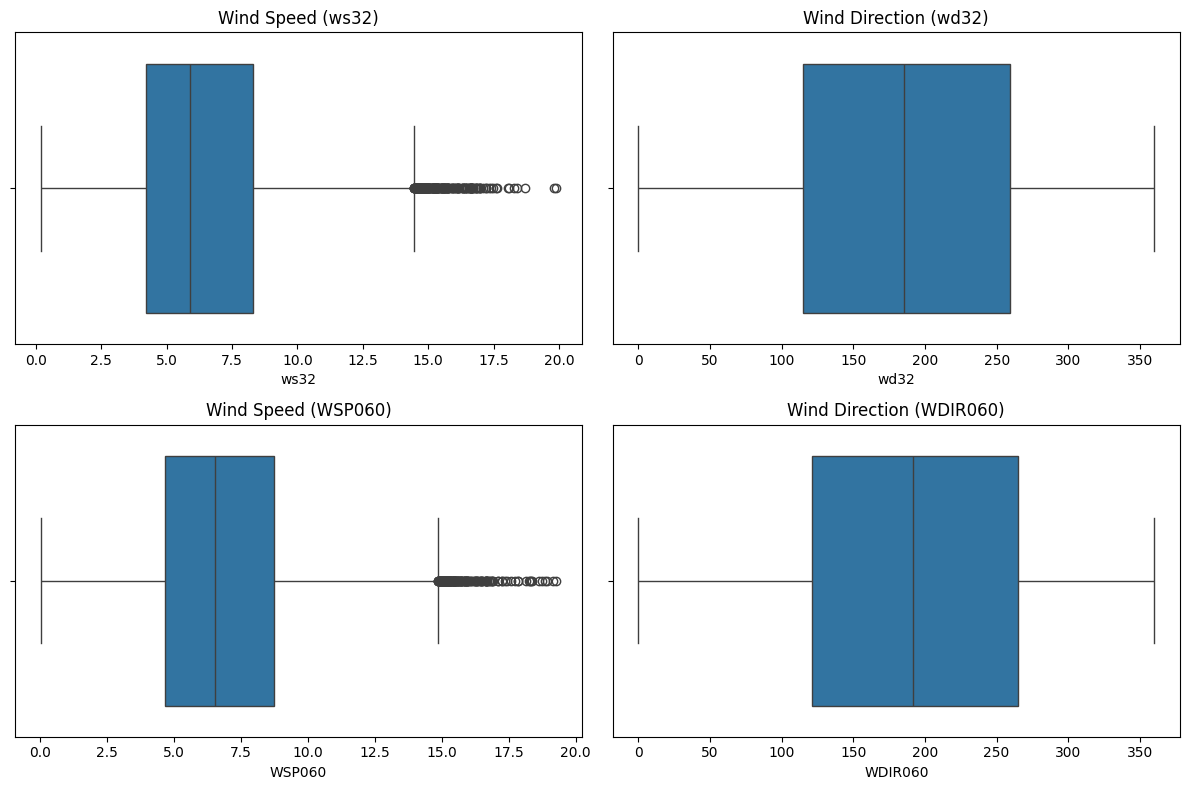

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
plt.figure(figsize=(12, 8))

# Plot for 'ws32'
plt.subplot(2, 2, 1)
sns.boxplot(x=df_result_cleaned['ws32'])
plt.title('Wind Speed (ws32)')

# Plot for 'wd32'
plt.subplot(2, 2, 2)
sns.boxplot(x=df_result_cleaned['wd32'])
plt.title('Wind Direction (wd32)')

# Plot for 'WSP060'
plt.subplot(2, 2, 3)
sns.boxplot(x=df_result_cleaned['WSP060'])
plt.title('Wind Speed (WSP060)')

# Plot for 'WDIR060'
plt.subplot(2, 2, 4)
sns.boxplot(x=df_result_cleaned['WDIR060'])
plt.title('Wind Direction (WDIR060)')

# Adjust layout
plt.tight_layout()
plt.show()

The wind speed data appears to have some outliars that could potentially distort the relationship between the variables and lead to poor model performance. We are planning to train a linear regression model witht this data. Instead of completely removing the values as wind flunctuations like this are valid, but the outliars are a bit extreme, the values will be capped within a reasonable threshold.

In [246]:
# Set the lower and upper bounds
ws32_lower_bound = df_result_cleaned['ws32'].quantile(0.01)
ws32_upper_bound = df_result_cleaned['ws32'].quantile(0.99)
WSP060_lower_bound = df_result_cleaned['WSP060'].quantile(0.01)
WSP060_upper_bound = df_result_cleaned['WSP060'].quantile(0.99)

data_without_outliers=df_result_cleaned

# Cap wind speed values at these bounds
data_without_outliers['ws32'] = df_result_cleaned['ws32'].clip(lower=ws32_lower_bound, upper=ws32_upper_bound)
data_without_outliers['WSP060'] = df_result_cleaned['WSP060'].clip(lower=WSP060_lower_bound, upper=WSP060_upper_bound)


C:\Users\camil\AppData\Local\Temp\ipykernel_37440\3721185371.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outliers['ws32'] = df_result_cleaned['ws32'].clip(lower=ws32_lower_bound, upper=ws32_upper_bound)
C:\Users\camil\AppData\Local\Temp\ipykernel_37440\3721185371.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outliers['WSP060'] = df_result_cleaned['WSP060'].clip(lower=WSP060_lower_bound, upper=WSP060_upper_bound)


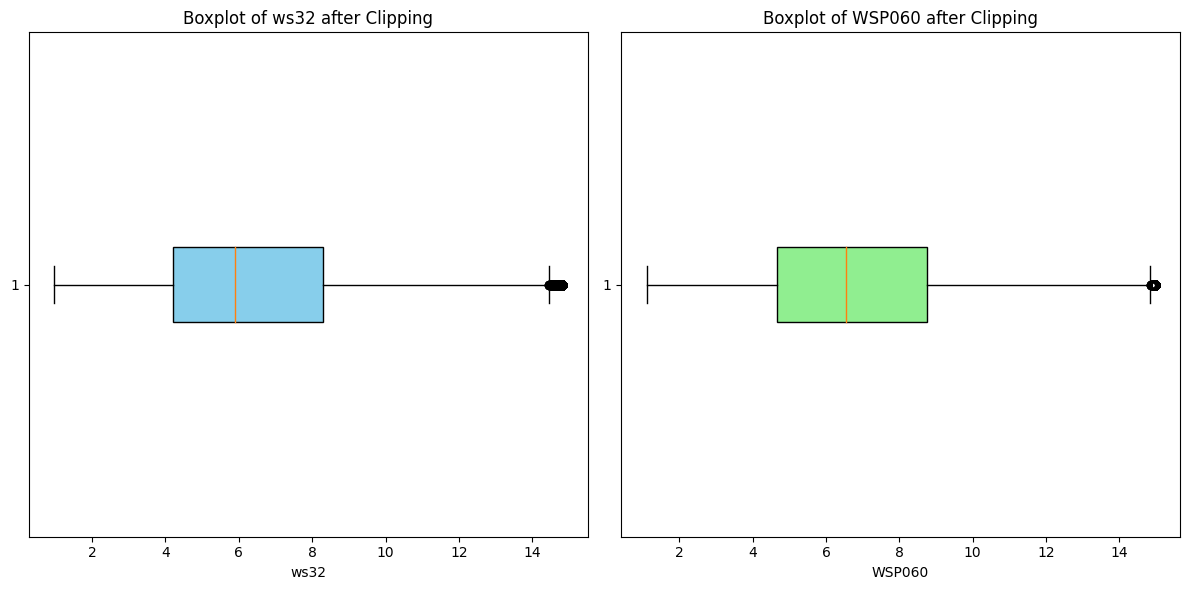

In [247]:
import matplotlib.pyplot as plt

# Create a figure with two subplots for the two columns
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot boxplot for 'ws32' after clipping
ax[0].boxplot(data_without_outliers['ws32'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
ax[0].set_title('Boxplot of ws32 after Clipping')
ax[0].set_xlabel('ws32')

# Plot boxplot for 'WSP060' after clipping
ax[1].boxplot(data_without_outliers['WSP060'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax[1].set_title('Boxplot of WSP060 after Clipping')
ax[1].set_xlabel('WSP060')

# Display the box plots
plt.tight_layout()
plt.show()

# Exploratory Analysis

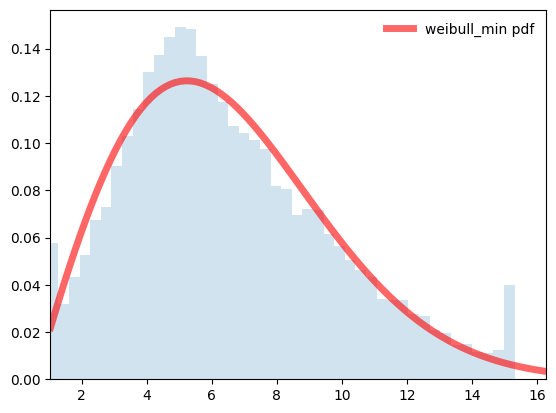

In [63]:
# the following analysis checks if wind speed data follows a weibull distribution for mast windspeed, commonly used to model wind speeds due to its flexibility in representing skewed data

# the weibull_min.fit function estimates parameters c, loc and scale to create a Weibull curve that best matches the wind speed data.

# plotting the Weibull probability density function (pdf) on a histogram of actual wind speeds allows to assess how well the Weibull distribution describes the wind speed variation.

c, loc, scale = weibull_min.fit(data_without_outliers['ws32'].values)

fig, ax = plt.subplots(1, 1)
x = np.linspace(weibull_min.ppf(0.005, c,loc= loc, scale = scale),
                weibull_min.ppf(0.995, c, loc= loc, scale = scale), 100)
ax.plot(x, weibull_min.pdf(x, c, loc= loc, scale = scale),
       'r-', lw=5, alpha=0.6, label='weibull_min pdf')

ax.hist(data_without_outliers['ws32'].values, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

ax.set_xlim([x[0], x[-1]])

ax.legend(loc='best', frameon=False)

plt.show()

# Training Models

In [64]:
# wind direction is cyclical (0 and 360 degrees are the same direction), 
# so converting to sine and cosine helps model this properly. Therefore, we prepare the data to have cyclical features
data_without_outliers['WDIR060_sin'] = np.sin(np.radians(data_without_outliers['WDIR060']))
data_without_outliers['WDIR060_cos'] = np.cos(np.radians(data_without_outliers['WDIR060']))

# include cyclical features along with the original ones, select the target variable
X = data_without_outliers[['WSP060', 'WDIR060_sin', 'WDIR060_cos', 'east', 'north', 'season', 'year']]
y = data_without_outliers['ws32']

# the wind behaviour is not straight-forward, which is why it is a good idea to introduce interaction terms
# on how different features might influence each other (e.g., in this case, how east and north interact with wind direction and how much they are affected by it)

# apply polynomial features with degree 2 for interaction termspoly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# scale the features to standardize them and ensure each feature contributes to the model equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# split the data into training, test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# fixed alpha values for Ridge and Lasso Regression models. We used different aplha values for Ridge and Lasso as they respond to regularization differently. 
# Ridge (L2 regularization) spreads the penalty across all coefficients and generally needs a higher alpha to shrink them while still keeping some influence from the features. 
# Lasso (L1 regularization) drops less important features from the model. 
# Smaller alpha keeps the model from becoming too sparse, allowing it to keep more features.
ridge_alpha = 1.0 
lasso_alpha = 0.01 

# define models
ridge_model = Ridge(alpha=ridge_alpha)
lasso_model = Lasso(alpha=lasso_alpha)

# train models on training data and evaluate them on the validation set to fine-tune performance before final testing
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# using the validation sets for prediction
y_pred_ridge_val = ridge_model.predict(X_val) 
y_pred_lasso_val = lasso_model.predict(X_val) 

# evaluating models on the validation set
mse_ridge_val = mean_squared_error(y_val, y_pred_ridge_val)
r2_ridge_val = r2_score(y_val, y_pred_ridge_val)

mse_lasso_val = mean_squared_error(y_val, y_pred_lasso_val)
r2_lasso_val = r2_score(y_val, y_pred_lasso_val)

# output results for validation to check
# print("Ridge Regression (Validation Set)")
# print(f"Validation Mean Squared Error: {mse_ridge_val:.4f}")
# print(f"Validation R-squared: {r2_ridge_val:.4f}")

# print("\nLasso Regression (Validation Set)")
# print(f"Validation Mean Squared Error: {mse_lasso_val:.4f}")
# print(f"Validation R-squared: {r2_lasso_val:.4f}")

# create pipelines for cross-validation
pipeline_ridge = make_pipeline(StandardScaler(), ridge_model)
pipeline_lasso = make_pipeline(StandardScaler(), lasso_model)

# performing K-Fold Cross-Validation to reduce overfitting
ridge_cv_scores = cross_val_score(pipeline_ridge, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
lasso_cv_scores = cross_val_score(pipeline_lasso, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# calculate the average MSE for cross-validation to ensure the model generalizes well to unseen data and reduce overfitting
mse_ridge_cv = -ridge_cv_scores.mean()
mse_lasso_cv = -lasso_cv_scores.mean()

# final model for evaluation

# fit the models on the training data
pipeline_ridge.fit(X_train, y_train)
pipeline_lasso.fit(X_train, y_train)

# make predictions on the test set
y_pred_ridge = pipeline_ridge.predict(X_test)
y_pred_lasso = pipeline_lasso.predict(X_test)

# evaluate the models on the test set
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# print results for Ridge on test set
print("\nRidge Regression (Test Set)")
print(f"Test Mean Squared Error: {round(mse_ridge, 2)}")
print(f"Test R-squared: {round(r2_ridge, 2)}")

# print results for Lasso on test set
print("\nLasso Regression (Test Set)")
print(f"Test Mean Squared Error: {round(mse_lasso, 2)}")
print(f"Test R-squared: {round(r2_lasso, 2)}")

C:\Users\48663\AppData\Local\Temp\ipykernel_24196\3237368897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outliers['WDIR060_sin'] = np.sin(np.radians(data_without_outliers['WDIR060']))
C:\Users\48663\AppData\Local\Temp\ipykernel_24196\3237368897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outliers['WDIR060_cos'] = np.cos(np.radians(data_without_outliers['WDIR060']))



Ridge Regression (Test Set)
Test Mean Squared Error: 0.38
Test R-squared: 0.96

Lasso Regression (Test Set)
Test Mean Squared Error: 0.42
Test R-squared: 0.96


##### The R² values for Ridge and Lasso regressions were relatively high, so a significant portion of the variance in wind speed was captured by our model. Additionally, the MSE values for both Ridge and Lasso models were low, which indicates that the predicted wind speeds were close to the actual values.

##### Since the models demonstrate strong predictive performance, the regression techniques like Ridge and Lasso with more time and enhancements can serve as effective, cost-efficient alternatives to neural networks for generating LTC wind data for Vestas.